In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import matplotlib.cm as cm
import pandas as pd

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
review = pd.read_csv('Musical_instruments_reviews.csv/Musical_instruments_reviews.csv')

In [5]:
review.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [40]:
review.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"
10260,A2WA8TDCTGUADI,B00JBIVXGC,TheTerrorBeyond,"[0, 0]","These strings are really quite good, but I wou...",4.0,"These strings are really quite good, but I wou...",1405468800,"07 16, 2014"


In [41]:
review.describe

<bound method NDFrame.describe of            reviewerID        asin  \
0      A2IBPI20UZIR0U  1384719342   
1      A14VAT5EAX3D9S  1384719342   
2      A195EZSQDW3E21  1384719342   
3      A2C00NNG1ZQQG2  1384719342   
4       A94QU4C90B1AX  1384719342   
5      A2A039TZMZHH9Y  B00004Y2UT   
6      A1UPZM995ZAH90  B00004Y2UT   
7       AJNFQI3YR6XJ5  B00004Y2UT   
8      A3M1PLEYNDEYO8  B00004Y2UT   
9       AMNTZU1YQN1TH  B00004Y2UT   
10     A2NYK9KWFMJV4Y  B00004Y2UT   
11     A35QFQI0M46LWO  B00005ML71   
12     A2NIT6BKW11XJQ  B00005ML71   
13     A1C0O09LOLVI39  B00005ML71   
14     A17SLR18TUMULM  B00005ML71   
15     A2PD27UKAD3Q00  B00005ML71   
16      AKSFZ4G1AXYFC  B000068NSX   
17      A67OJZLHBBUQ9  B000068NSX   
18     A2EZWZ8MBEDOLN  B000068NSX   
19     A1CL807EOUPVP1  B000068NSX   
20     A1GMWTGXW682GB  B000068NSX   
21     A2G12DY50U700V  B000068NSX   
22      A3E0CF25A7LD2  B000068NSX   
23     A2W3CLAYZLDPTV  B000068NTU   
24     A398X9POBHK69N  B000068NTU   
25  

In [42]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
reviewerID        10261 non-null object
asin              10261 non-null object
reviewerName      10234 non-null object
helpful           10261 non-null object
reviewText        10254 non-null object
overall           10261 non-null float64
summary           10261 non-null object
unixReviewTime    10261 non-null int64
reviewTime        10261 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [6]:
review.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [7]:
review_orginal = review.copy()

In [8]:
review.dropna()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,1356048000,"12 21, 2012"
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014"
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012"
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,1215302400,"07 6, 2008"
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,"01 8, 2014"


In [9]:
review = review.drop(['reviewerID','asin','reviewerName'],axis=1)


In [10]:
def rating(x):
    if x == 5:
        return('Excellent')
    elif x==4:
        return('Super')
    elif x==3:
        return('Need to inprove')
    elif x==2:
        return('Requires more changes')
    elif x==1:
        return('Waste')

In [11]:
review['overall'] = review['overall'].apply(lambda x: rating(x))


In [12]:
review['overall'].value_counts()

Excellent                6938
Super                    2084
Need to inprove           772
Requires more changes     250
Waste                     217
Name: overall, dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

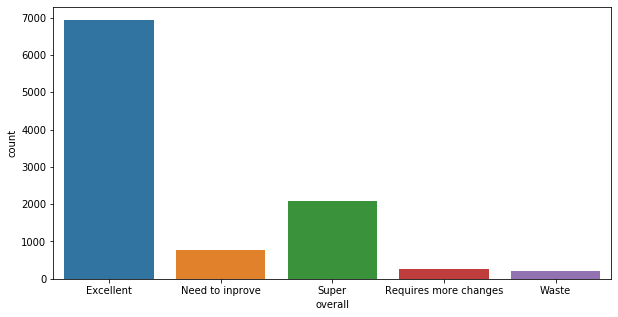

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='overall',data=review)
plt.show()

In [15]:
review_5 = review[review['overall'] == 'Excellent']
review_43 = review[(review['overall'] == 'Super') | (review['overall'] == 'Need to improve')]
review_21 = review[(review['overall'] == 'Required more changes' ) | (review['overall'] =='Waste')]

In [16]:
review_43.head()

,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
11,"[0, 0]",I got it to have it if I needed it. I have fou...,Super,It works great but I hardly use it.,1398124800,"04 22, 2014"
16,"[0, 0]",This Fender cable is the perfect length for me...,Super,Durable Instrument Cable,1376352000,"08 13, 2013"
20,"[0, 0]",This is a cool looking cheap cable which works...,Super,"Cheap and cool looking, good length",1331856000,"03 16, 2012"
22,"[0, 0]",Very good cable. Well made and it looks great ...,Super,Guitar Cable,1354924800,"12 8, 2012"
25,"[0, 0]",Cant go wrong. Great quality on a budget price...,Super,Its a Hosa,1372809600,"07 3, 2013"


In [17]:
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
wordcloud1 = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10,max_words=150).generate(' '.join(review_43['summary']))

wordcloud2 = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10,max_words=150).generate(' '.join(review_5['summary']))

wordcloud3 = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10,max_words=150).generate(' '.join(review_21['summary']))

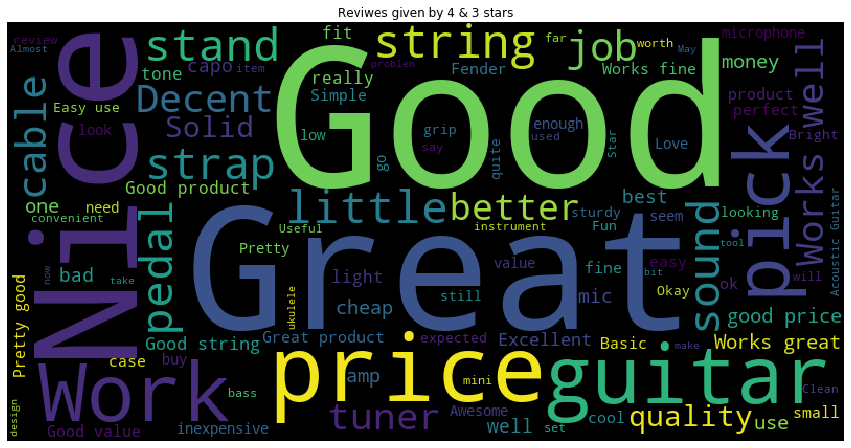

In [18]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('Reviwes given by 4 & 3 stars')
plt.show()

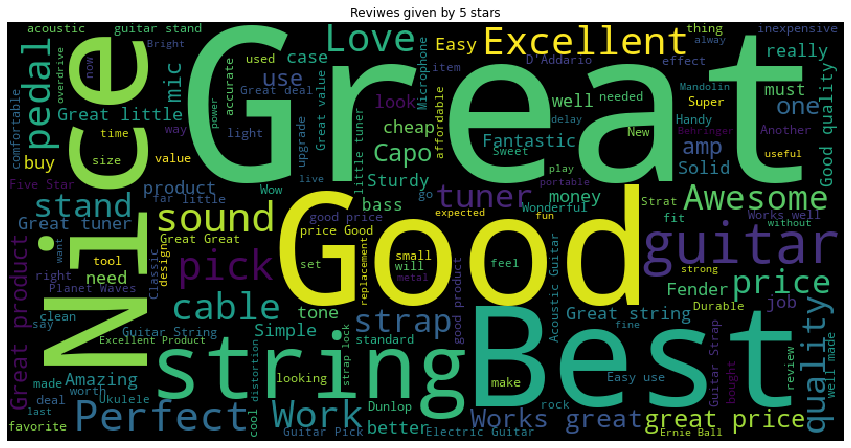

In [19]:
### most comments given 
plt.figure(figsize=(15,10))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title('Reviwes given by 5 stars')
plt.show()

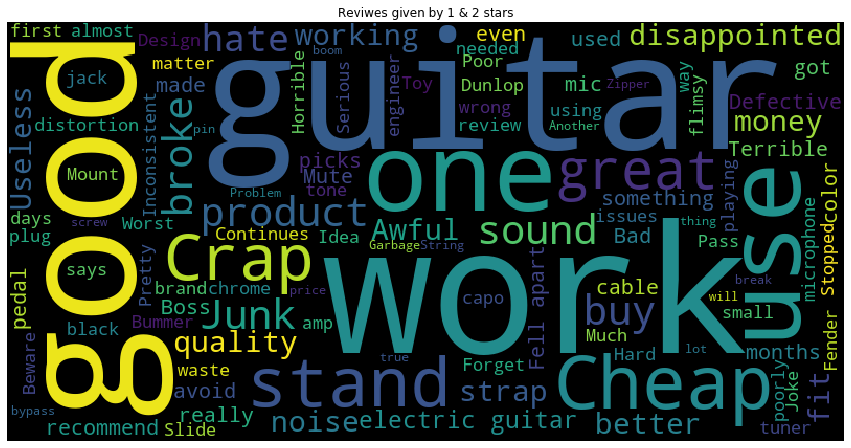

In [20]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title('Reviwes given by 1 & 2 stars')
plt.show()

In [21]:
review_5.head(5)

,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,"[0, 0]","Not much to write about here, but it does exac...",Excellent,good,1393545600,"02 28, 2014"
1,"[13, 14]",The product does exactly as it should and is q...,Excellent,Jake,1363392000,"03 16, 2013"
2,"[1, 1]",The primary job of this device is to block the...,Excellent,It Does The Job Well,1377648000,"08 28, 2013"
3,"[0, 0]",Nice windscreen protects my MXL mic and preven...,Excellent,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,"[0, 0]",This pop filter is great. It looks and perform...,Excellent,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [22]:
review_5[['reviewText','summary']].sample(10)

,reviewText,summary
3339,I bought these when I had to re-tube my Marsha...,JJ ECC83 Preamp Tube
3204,This is the 2nd set of these Fender parts I've...,aged-white strat parts
1958,I like the sound of this pedal and the ability...,DigiTech DBM Bad Monkey Tube-Overdrive Analog-...
9568,"A great little amplifier. Good quality, good ...",Great Little Amp
974,"I play 5-string bass, both electric and acoust...","Yup, it stays on re-order list"
8557,30 bucks is better than 179 for the tube screa...,Awesome price and deal
7233,I wanted a noise reducer because I have like 1...,Does it job well
5876,I've got two other Levy's cotton straps that I...,Great strap!! BE AWARE THAT THERE ARE TWO LENG...
1991,I have many expensive cases for my guitars and...,awesome case
5925,"Study strap. Great feel, leather matches my in...",Great Strap


In [23]:
## 10 sample reviews of medium ratings
review_43[['reviewText','summary']].sample(10)

,reviewText,summary
7472,This is a very simple boost with a small footp...,A Good Boost for Humbuckers
4478,I sent this to my grown daughter for her birth...,Korg is king
3995,It's well made and is fine as straps go but th...,"The ""pocket"" really doesn't work well"
1316,This is a handy little tool. The winder is nic...,Pretty good
8575,"Despite being so small, it will fill most room...",Looks Great. Worth the price!
3544,"It is a nice clip, works for my mics.I don't l...",Nice holder
2944,"Don't panic, strings marked A/D/F#/B CAN be us...",Don't Panic...
6187,The reason I bought this pedal was for the &#3...,Sweet pedal. Comprehensive review
3946,"Musicfriends, This is a fab item - For 20.00 Y...",20.00!!! You can't go wrong on this
7174,They seem the same but the original schallers ...,I like the Original Schallers better yet they ...


In [24]:
review_21[['reviewText','summary']].sample(10)

,reviewText,summary
5605,It was Not what I wanted. When A Person has a ...,Cost Too Much
6695,Doesn't wotk with V-Amp 3. Doubt it works at ...,Doesn't work
7996,I play harp with some some that I perform. I f...,Notes off Hard to play
9170,The device itself is difficult to read in brig...,Not recommend in my opinion
9682,This product has an extremely flimsy spring me...,ChargerCity Microphone Stand Tablet Mount
8518,Works as advertised but the keys are stiff. Pa...,OK for the price and USB connection without in...
408,This is a cheap piece of junk that does what i...,It distorts
4405,"This thing is useless. Good idea, but way too ...","Pass on this - too light, tips over constantly."
7357,This product has almost zero documentation in ...,Requires indepth MIDI knowledge - Akai does no...
3192,"Need 2 volume knobs and 1 tone, so for the pri...",Inconsistent sets probably no QC for these.


In [25]:
review_5['summary'].describe()

count      6938
unique     5950
top       Great
freq         41
Name: summary, dtype: object

In [26]:
review_43['summary'].describe()

count             2084
unique            1918
top       Does the job
freq                13
Name: summary, dtype: object

In [27]:
review_21['summary'].describe()

count      217
unique     210
top       Crap
freq         3
Name: summary, dtype: object

In [28]:
review_21_group = review_21.groupby('summary').count()[['reviewText']]
review_21_group.head()


,reviewText
summary,
180 degrees out,1
A Complete Joke,1
A Toy,1
A lot a noise when using rate different from 50%,1
Absolute Junk,1


In [30]:
review_21_com = review_21[['reviewText','summary']]

In [31]:
def my_tokenizer(x):
    return x.split('.') if x != None else []
review_21_tokens = review_21_com.reviewText.map(my_tokenizer).sum()

In [32]:
from collections import Counter
counter = Counter(review_21_tokens)
counter.most_common(50)

[('', 554),
 ('Our family of 2 guitarists and 1 bassist switched to these style locks about a year ago',
  2),
 ('  Every one of us has had continual problems with the locks periodically unscrewing themselves from the guitar body',
  2),
 (' I had one back out during a gig and damage a brand new 60th Anniversary American P-Bass',
  2),
 ('not good', 2),
 (' My son had one come out on him in the middle of a gig last weekend', 2),
 ("The problem with the design is there's a ton of friction between the top and bottom pieces of the lock which results in the tab that's screwed into the body unscrewing itself",
  2),
 ("  We've tried applying bar soap, petro jelly, and a spray can based dry lubricant",
  2),
 (' none of which prevented the ultimate forces that cause this phenomenon',
  2),
 ("We are switching to the Dunlop style locks as that design incorporates ball bearings which allows the strap to rotate freely back and forth with next to zero 'unscrewing' force",
  2),
 ("  Maybe we're 

In [2]:
from spacy.lang.en.stop_words import STOP_WORDS
def remove_token (token):
    return [t for t in token if t not in STOP_WORDS]

ModuleNotFoundError: No module named 'spacy'

In [4]:
counter = Counter(remove_token(review_21_tokens))
counter.most_common(50)

NameError: name 'Counter' is not defined